IMPORT **LIBRARY**



In [2]:
# !pip install sastrawi
# # !pip install tweepy

import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# nltk.download('stopwords')
# from nltk.corpus import stopwords

PRE-PROCESSING DATA

In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n+", " ", text)  # Menghapus newline
    text = re.sub(r"[^A-Za-z0-9^,]", " ", text)  # Menghapus karakter selain huruf dan angka
    text = re.sub(r",", " ", text)  # Mengganti tanda koma dengan spasi
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'@\w+', '', text)  # Menghapus mention
    text = re.sub(r"\.", " ", text)  # Mengganti titik dengan spasi
    text = re.sub(r"\!", " ", text)  # Mengganti tanda seru dengan spasi
    text = re.sub(r"\/", " ", text)  # Mengganti tanda garis miring dengan spasi
    text = re.sub(r"\^", " ", text)  # Mengganti tanda petik dengan spasi
    text = re.sub(r"\+", " ", text)  # Mengganti tanda tambah dengan spasi
    text = re.sub(r"\-", " ", text)  # Mengganti tanda minus dengan spasi
    text = re.sub(r"\=", " ", text)  # Mengganti tanda sama dengan spasi
    text = re.sub(r"'", " ", text)  # Menghapus tanda petik tunggal
    text = re.sub(r":", " ", text)  # Mengganti titik dua dengan spasi
    text = re.sub(r'\bhttps?://\S+\b', '', text)  # Menghapus URL
    text = re.sub(r'\bhttps\b', '', text)  # Menghapus 'https'
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)  # Mengganti 'k' dengan '000' untuk angka
    text = ' '.join(text.split())  # Menghapus spasi berlebihan
    return text

result = clean_text('ratna budi dan dia #goks https://t.co/vuafccpqu3')
print(result)


ratna budi dan dia goks t co vuafccpqu3


In [3]:
def stem_text(text):
    # Inisialisasi stemmer Bahasa Indonesia
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi kata-kata
    words = text.split()

    # Melakukan stemming pada setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang sudah distem menjadi teks yang bersih
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text


In [5]:
def tokenizing(text):
  # Membuat token array
  tokens_word = text.split(" ")
  print(tokens_word)

tokenizing('iini anies bukan lagi debat anjir tapi lagi ngajarin prabowo cara pikir psdm') 

['iini', 'anies', 'bukan', 'lagi', 'debat', 'anjir', 'tapi', 'lagi', 'ngajarin', 'prabowo', 'cara', 'pikir', 'psdm']


Mengambil dataset

In [ ]:
df

,full_text
0,@syaithannn @neohistoria_id Salah satu yg mena...
1,cewe yg suka cowo humoris pasti milihnya cak imin
2,@kikysaputrii Gua yg suka dri pak anies dan ca...
3,@detikcom Cak Imin kemana saja selama 9 tahun ...
4,@imanlagi cak imin mirip eko patrio wkwkw
...,...
254,Ikutan #nazarpemilu Kalau Prabowo Gibran kal...
255,Seru bgt cak imin kena mulu lagi wkwkwkwk
256,@dlayyyyyyyy cak imin kapan live
257,@mihrabku @aniesbaswedan @prabowo @ganjarprano...


LAKUKAN PRE-PROCESSING

In [11]:
df = pd.read_csv('twitter-data.csv')  # Ganti 'nama_file.csv' dengan nama file CSV Anda
print("dataset")
# print(df)
print("")
print('==========================================================================================================')
print("")
clean = df['full_text'].apply(clean_text).values
df['cleaned-texts'] = clean
# print(df)
print("")
print('==========================================================================================================')
print("")
stemmed_texts = [stem_text(full_text) for full_text in clean]
df['stemmed-texts'] = stemmed_texts
# print(df)
print("")
print('==========================================================================================================')
print("")
tokenize_texts = [tokenizing(full_text) for full_text in stemmed_texts]
df['tokenized-texts'] = tokenize_texts
# print(df)
print("")
print('==========================================================================================================')

print('=========================================HASIL============================================================')
df['pre-process'] = stemmed_texts
df.to_csv('sentimen-pub-pre-process.csv', index=False)
print(df)

dataset






['idextratime', 'anies', 'tega', 'nanyain', 'soal', 'lindung', 'perempuan', 'ke', 'prabowo', 'lha', 'wong', 'prabowo', 'aja', 'ga', 'lindung', 'istri', 'malah', 'pegat', 'noohhh', 'titiek']
['pertanyan', 'pak', 'anies', 'soal', 'lindung', 'kepada', 'perempuan', 'di', 'jawab', 'sendiri', 'oleh', 'pak', 'anies']
['rugi', 'sih', 'klo', 'pak', 'anies', 'ga', 'naik']
['wkwk', 'pa', 'anies', 'sblm', 'nanya', 'ke', 'pa', 'prabowo', 'senyam', 'senyum', 'rem', 'bgt']
['anjirrr', 'finally', 'pak', 'anies', 'ngomongnya', 'lewat', 'waktu', 'walau', 'cma', 'terima', 'kasih', 'doang', 'wkakakakkakaka', 't', 'co', 'vuafccpqu3']
['yaallah', 'anies', 'ngomong', 'akan', 'tindak', 'keras', 'perempuan', 'masuk', 'sejak', 'catcalling', 'gue', 'ken', 'nang', 'detik']
['pak', 'anies', 'tadi', 'udah', 'ngejelasin', 'da', 'naha', 'ai', 'pak', 'prabowo', 'jawab', 'tidak', 'nyambung']
['tadi', 'pak', 'anies', 'kurang', 'tegas']
['pak', 'anies', 'jangan', 'tanya', 'soal', 'perempuan', 'ke', 'pak', '

ANALISIS SENTIMEN MENGGUNAKAN LEXICON-BASED DENGAN INSET LEXICON ID

In [6]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-after.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-after.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data.csv', index=False)

3819
6782
Kata: anies, Bobot: 3.0
3.0
Kata: tega, Bobot: -5.0
-2.0
Kata: soal, Bobot: -1.0
-3.0
Kata: lindung, Bobot: 3.0
0.0
Kata: perempuan, Bobot: 3.0
3.0
Kata: prabowo, Bobot: 3.0
6.0
Kata: lha, Bobot: -3.0
3.0
Kata: prabowo, Bobot: 3.0
6.0
Kata: aja, Bobot: -2.0
4.0
Kata: ga, Bobot: -4.0
0.0
Kata: lindung, Bobot: 3.0
3.0
Kata: malah, Bobot: -3.0
0.0
Kata: pegat, Bobot: -4.0
-4.0
Kata: noohhh, Bobot: -2.0
-6.0
Kata: pak, Bobot: 1.0
1.0
Kata: anies, Bobot: 3.0
4.0
Kata: soal, Bobot: -1.0
3.0
Kata: lindung, Bobot: 3.0
6.0
Kata: perempuan, Bobot: 3.0
9.0
Kata: jawab, Bobot: -3.0
6.0
Kata: sendiri, Bobot: -3.0
3.0
Kata: oleh, Bobot: -1.0
2.0
Kata: pak, Bobot: 1.0
3.0
Kata: anies, Bobot: 3.0
6.0
Kata: rugi, Bobot: -4.0
-4.0
Kata: sih, Bobot: -2.0
-6.0
Kata: pak, Bobot: 1.0
-5.0
Kata: anies, Bobot: 3.0
-2.0
Kata: ga, Bobot: -4.0
-6.0
Kata: naik, Bobot: 1.0
-5.0
Kata: wkwk, Bobot: -4.0
-4.0
Kata: pa, Bobot: 1.0
-3.0
Kata: anies, Bobot: 3.0
0.0
Kata: nanya, Bobot: -2.0
-2.0
Kata: pa, Bobot

In [3]:
df = pd.read_csv('analyzed_data.csv')

# Menghitung frekuensi masing-masing label
label_counts = df['sentiment'].value_counts()

# Menghitung total jumlah data
total_data = len(df)
print(total_data)

# Menghitung persentase positif, negatif, dan netral
percentage_positive = (label_counts.get('Positif', 0) / total_data) * 100
percentage_negative = (label_counts.get('Negatif', 0) / total_data) * 100
percentage_neutral = (label_counts.get('Netral', 0) / total_data) * 100

# Menampilkan hasil
print(f"Persentase Positive: {percentage_positive:.2f}%")
print(f"Persentase Negative: {percentage_negative:.2f}%")
print(f"Persentase Neutral: {percentage_neutral:.2f}%")


1030
Persentase Positive: 63.30%
Persentase Negative: 32.62%
Persentase Neutral: 4.08%


VISUALISASI HASIL

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18468\1017931775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')


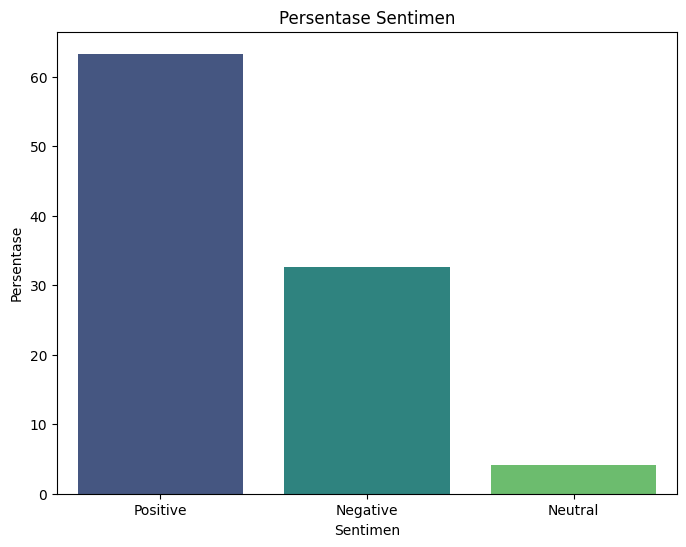

In [4]:
# Data untuk visualisasi
sentiment_labels = ['Positive', 'Negative', 'Neutral']
percentages = [percentage_positive, percentage_negative, percentage_neutral]

# Membuat bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')
plt.title('Persentase Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.show()

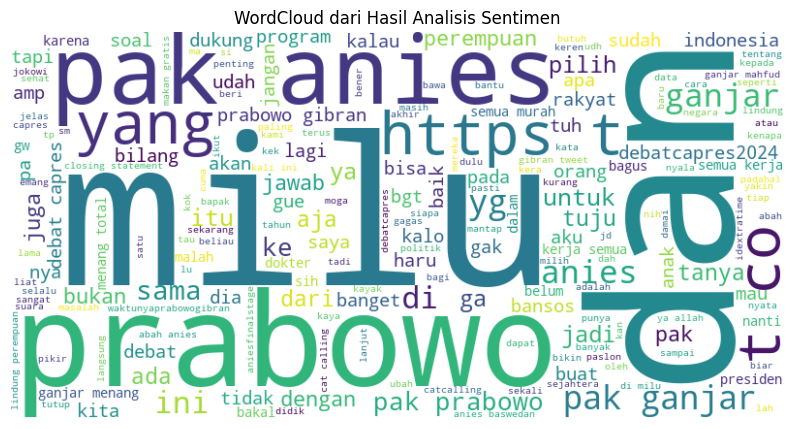

In [5]:
# Menggabungkan semua teks hasil analisis sentimen menjadi satu string
all_text = ' '.join(df['pre-process'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Hasil Analisis Sentimen')
plt.show()


**MENGHITUNG JUMLAH SENTIMEN POSITIF, NEGATIF, DAN NETRAL PADA FITUR SENTIMEN**

In [6]:
import pandas as pd

# Membaca file CSV
# Data Aktual
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
# Data Analisa sentimen
data2 = pd.read_csv('analyzed_data.csv')

# Menghitung jumlah positif, negatif, dan netral
positive_count = data1[data1['sentiment'] == 'Positif'].shape[0]
negative_count = data1[data1['sentiment'] == 'Negatif'].shape[0]
neutral_count = data1[data1['sentiment'] == 'Netral'].shape[0]

positive_count2 = data2[data2['sentiment'] == 'Positif'].shape[0]
negative_count2 = data2[data2['sentiment'] == 'Negatif'].shape[0]
neutral_count2 = data2[data2['sentiment'] == 'Netral'].shape[0]

print("Data Aktual")
print("Jumlah sentimen positif:", positive_count)
print("Jumlah sentimen negatif:", negative_count)
print("Jumlah sentimen netral:", neutral_count)
print("===========================================================================")
print("Data Analisa")
print("Jumlah sentimen positif:", positive_count2)
print("Jumlah sentimen negatif:", negative_count2)
print("Jumlah sentimen netral:", neutral_count2)

Data Aktual
Jumlah sentimen positif: 608
Jumlah sentimen negatif: 356
Jumlah sentimen netral: 66
Data Analisa
Jumlah sentimen positif: 652
Jumlah sentimen negatif: 336
Jumlah sentimen netral: 42


In [7]:
# Menghitung jumlah sentimen di dataset pertama
sentiment_counts1 = data1['sentiment'].value_counts()

# Menghitung jumlah sentimen di dataset kedua
sentiment_counts2 = data2['sentiment'].value_counts()

# Membandingkan nilai sentimen
for sentiment in sentiment_counts1.index:
    if sentiment in sentiment_counts2.index:
        count1 = sentiment_counts1[sentiment]
        count2 = sentiment_counts2[sentiment]
        print("Jumlah sentimen", sentiment, "di kedua dataset:", min(count1, count2))
    else:
        print("Nilai sentimen", sentiment, "hanya ada di dataset pertama:", sentiment_counts1[sentiment])

for sentiment in sentiment_counts2.index:
    if sentiment not in sentiment_counts1.index:
        print("Nilai sentimen", sentiment, "hanya ada di dataset kedua:", sentiment_counts2[sentiment])


Jumlah sentimen Positif di kedua dataset: 608
Jumlah sentimen Negatif di kedua dataset: 336
Jumlah sentimen Netral di kedua dataset: 42


In [8]:
benar = 0
salah = 0

# Membandingkan nilai sentimen di kedua dataset
for sentiment in sentiment_counts1.index:
    if sentiment in sentiment_counts2.index:
        count1 = sentiment_counts1[sentiment]
        count2 = sentiment_counts2[sentiment]
        benar += min(count1, count2)
        salah += abs(count1 - count2)  # Menambahkan perbedaan ke dalam variabel salah
    else:
        salah += sentiment_counts1[sentiment]  # Semua nilai yang hanya ada di dataset pertama adalah salah

# # Menambahkan nilai sentimen yang hanya ada di dataset kedua ke dalam variabel salah
# for sentiment in sentiment_counts2.index:
#     if sentiment not in sentiment_counts1.index:
#         salah += sentiment_counts2[sentiment]  # Semua nilai yang hanya ada di dataset kedua adalah salah

tot_data = len(data1)
print(tot_data)
salah = tot_data-benar

print("Jumlah nilai sentimen yang sama di kedua dataset:", benar)
print("Jumlah nilai sentimen yang berbeda di kedua dataset:", salah)

1030
Jumlah nilai sentimen yang sama di kedua dataset: 986
Jumlah nilai sentimen yang berbeda di kedua dataset: 44


MENGHITUNG JUMLAH KELAS AA (Positif-Positif) HINGGA CC (Netral-Netral) untuk menghitung Confusion Matrix 3 dimensi

In [9]:
# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
print('Total data sama : ', ((AA+BB+CC)/total)*100,'%')

Kelas AA: 586
Kelas AB: 14
Kelas AC: 8
Kelas BA: 35
Kelas BB: 309
Kelas BC: 12
Kelas CA: 31
Kelas CB: 13
Kelas CC: 22
917
1030
Total data sama :  89.02912621359224 %


**Confusion Matrix**
menghitung tingkat akurasi dari penelitian

In [10]:
# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

917
0.8902912621359224
22
0.9638157894736842
47
0.8679775280898876
44
0.3333333333333333
recall
66
0.8987730061349694
27
0.9196428571428571
20
0.5238095238095238
Accuracy :  0.8902912621359224 ==  89.02912621359224 %
Precision :  0.7217088836323017 ==  72.17088836323016 %
Recall :  0.7807417956957834 ==  78.07417956957833 %
F1-Score :  0.750065606185053 ==  75.0065606185053 %


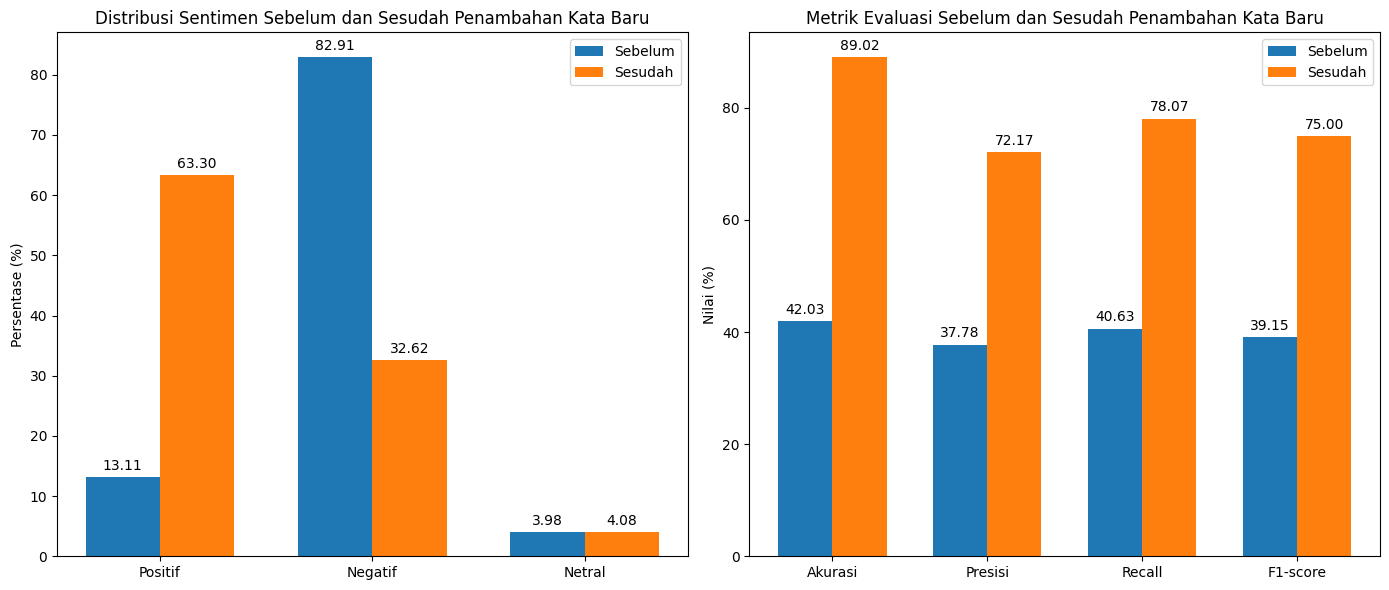

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data sentimen sebelum dan sesudah penambahan kata baru
sentimen_sebelum = [13.11, 82.91, 3.98]
sentimen_sesudah = [63.30, 32.62, 4.08]
labels_sentimen = ['Positif', 'Negatif', 'Netral']

# Data metrik evaluasi sebelum dan sesudah penambahan kata baru
metrik_sebelum = [42.03, 37.78, 40.63, 39.15]
metrik_sesudah = [Accuracy, Precision, Recall, F1score]
labels_metrik = ['Akurasi', 'Presisi', 'Recall', 'F1-score']

# Mengatur lokasi label sumbu x
x_sentimen = np.arange(len(labels_sentimen))
x_metrik = np.arange(len(labels_metrik))

width = 0.35  # Lebar bar

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot untuk distribusi sentimen
rects1 = ax[0].bar(x_sentimen - width/2, sentimen_sebelum, width, label='Sebelum')
rects2 = ax[0].bar(x_sentimen + width/2, sentimen_sesudah, width, label='Sesudah')

# Menambahkan label, judul, dan kustomisasi sumbu x
ax[0].set_ylabel('Persentase (%)')
ax[0].set_title('Distribusi Sentimen Sebelum dan Sesudah Penambahan Kata Baru')
ax[0].set_xticks(x_sentimen)
ax[0].set_xticklabels(labels_sentimen)
ax[0].legend()

# Plot untuk metrik evaluasi
rects3 = ax[1].bar(x_metrik - width/2, metrik_sebelum, width, label='Sebelum')
rects4 = ax[1].bar(x_metrik + width/2, metrik_sesudah, width, label='Sesudah')

# Menambahkan label, judul, dan kustomisasi sumbu x
ax[1].set_ylabel('Nilai (%)')
ax[1].set_title('Metrik Evaluasi Sebelum dan Sesudah Penambahan Kata Baru')
ax[1].set_xticks(x_metrik)
ax[1].set_xticklabels(labels_metrik)
ax[1].legend()

# Fungsi untuk menambahkan label di atas bar
def autolabel(rects, ax):
    """Menambahkan label teks di atas setiap bar dalam *rects*, menampilkan tinggi bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset vertikal 3 poin
                    textcoords="offset points",
                    ha='center', va='bottom')

# Menerapkan fungsi ke kedua set bar
autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])
autolabel(rects4, ax[1])

fig.tight_layout()

plt.show()


Input teks lalu di analisa

In [7]:
print(" ========= SELAMAT DATANG ========= ")
print(" === PREDIKSI AKTIVITAS BUZZER === ")
print('==================================')
print("")
teks = input("Masukkan teks yang ingin dianalisa : ")
# print("")
print(teks)
praproses = clean_text(teks)
print('========================================')
print('Hasil Clean teks : ', praproses)
print("")
praproses_stem = stem_text(praproses)
print('========================================')
print('Hasil Stemming teks : ', praproses_stem)
print("")
# praproses = tokenizing(praproses)
# print('========================================')
# print('Hasil Token teks : ', praproses)
# print("")
praproses = calculate_sentiment(praproses_stem)
print('========================================')
print('Skor sentimen : ', praproses)
print("")
praproses = interpret_sentiment(praproses)
buzzer = buzzer_sentiment(praproses)
print('========================================')
print('Hasil analisa adalah :', praproses, 'atau', buzzer)

 ========= SELAMAT DATANG ========= 
 === PREDIKSI AKTIVITAS BUZZER === 

Iini anies bukan lagi debat anjir tapi lagi ngajarin Prabowo cara berpikir psdm ðŸ˜‚
Hasil Clean teks :  iini anies bukan lagi debat anjir tapi lagi ngajarin prabowo cara berpikir psdm

Hasil Stemming teks :  iini anies bukan lagi debat anjir tapi lagi ngajarin prabowo cara pikir psdm

Kata: anies, Bobot: 3.0
3.0
Kata: bukan, Bobot: -5.0
-2.0
Kata: lagi, Bobot: -2.0
-4.0
Kata: debat, Bobot: 2.0
-2.0
Kata: anjir, Bobot: -3.0
-5.0
Kata: tapi, Bobot: -2.0
-7.0
Kata: lagi, Bobot: -2.0
-9.0
Kata: ngajarin, Bobot: -3.0
-12.0
Kata: prabowo, Bobot: 3.0
-9.0
Kata: pikir, Bobot: 1.0
-8.0
Skor sentimen :  -8.0

Hasil analisa adalah : Negatif atau Kalimat termasuk buzzer


PENGUJIAN PADA DATA LAIN SETELAH PEMILU DILAKUKAN

In [100]:
import pandas as pd

df = pd.read_csv('gibran-1.csv')
df = df[['full_text']]
df.to_csv('twitter-data_sesudahPemilu.csv', index=False)

In [101]:
df = pd.read_csv('twitter-data_sesudahPemilu.csv')  # Ganti 'nama_file.csv' dengan nama file CSV Anda
print("dataset")
# print(df)
print("")
print('==========================================================================================================')
print("")
clean = df['full_text'].apply(clean_text).values
df['cleaned-texts'] = clean
# print(df)
print("")
print('==========================================================================================================')
print("")
stemmed_texts = [stem_text(full_text) for full_text in clean]
df['stemmed-texts'] = stemmed_texts
# print(df)
print("")
print('==========================================================================================================')
print("")
tokenize_texts = [tokenizing(full_text) for full_text in stemmed_texts]
df['tokenized-texts'] = tokenize_texts
# print(df)
print("")
print('==========================================================================================================')

print('=========================================HASIL============================================================')
df['pre-process'] = stemmed_texts
df.to_csv('twitter-data-sesudah-preprocess.csv', index=False)
print(df)

dataset






['nurjann53781736', 'senderlabs', 'jangan', 'gitu', 'bang', 'doa', 'yg', 'baik2', 'aja', 'karena', 'aman', 'kembali', 'ke', 'kita']
['johnnys2123', 'gerindra', 'yusufagro', 'prabowo', 'gibran', 'tweet', 'bangsaygsujud', 'chavesz08', 'aditbandit234', 'kenikir27', 'anishectorium', 'almaghribis', 'askencana', 'papa', 'brewook', 'masak', 'pak', 'prabowo', 'bain', '1', 'orang', 'yang', 'potensi', 'rugi', 'bangsa', 'abai', 'puluh', 'juta', 'dukung', 'yang', 'cinta', 'bangsa']
['mqzawawi', 'idm', 'bukti', 'jadi', 'salah', 'satu', 'butuh', 'mutlak', 'dalam', 'proses', 'bangun', 'desa', 'idmkemendesabisa', 'jokowi', 'prabowo', 'gibran', 'tweet', 'halimiskandarnu', 'kemendesapdtt', 'malik', 'harammain', 'imansyukri']
['partaisocmed', 'kata', 'siapa', 'nyata', 'kata', 'orang2', 'prabowo', 'gibran', 'wkwkwkwk', 't', 'co', 'g8ygtdxgnm']
['wow', 'megeneralisir', 'dukung', 'prabowo', 'gibran', 'goblok', 'semua']
['indek', 'desa', 'bangun', 'idmkemendesabisa', 'jokowi', 'prabowo', 'gibra

In [6]:
data = pd.read_csv('twitter-data-sesudah-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-after.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-after.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-sesudahPemilu.csv', index=False)

3819
6782
Kata: jangan, Bobot: -4.0
-4.0
Kata: gitu, Bobot: -1.0
-5.0
Kata: bang, Bobot: 1.0
-4.0
Kata: doa, Bobot: 4.0
0.0
Kata: baik2, Bobot: 3.0
3.0
Kata: aja, Bobot: -2.0
1.0
Kata: aman, Bobot: 2.0
3.0
Kata: kembali, Bobot: -2.0
1.0
Kata: kita, Bobot: 3.0
4.0
Kata: prabowo, Bobot: 3.0
3.0
Kata: tweet, Bobot: -2.0
1.0
Kata: masak, Bobot: 2.0
3.0
Kata: pak, Bobot: 1.0
4.0
Kata: prabowo, Bobot: 3.0
7.0
Kata: bain, Bobot: -2.0
5.0
Kata: 1, Bobot: -1.0
4.0
Kata: orang, Bobot: 1.0
5.0
Kata: potensi, Bobot: 2.0
7.0
Kata: rugi, Bobot: -4.0
3.0
Kata: abai, Bobot: -3.0
0.0
Kata: dukung, Bobot: 3.0
3.0
Kata: cinta, Bobot: 3.0
6.0
Kata: bukti, Bobot: 2.0
2.0
Kata: jadi, Bobot: 1.0
3.0
Kata: salah, Bobot: -4.0
-1.0
Kata: satu, Bobot: -1.0
-2.0
Kata: butuh, Bobot: -2.0
-4.0
Kata: mutlak, Bobot: -3.0
-7.0
Kata: dalam, Bobot: 2.0
-5.0
Kata: proses, Bobot: 1.0
-4.0
Kata: bangun, Bobot: 4.0
0.0
Kata: prabowo, Bobot: 3.0
3.0
Kata: tweet, Bobot: -2.0
1.0
Kata: kata, Bobot: -1.0
-1.0
Kata: siapa, Bobot

In [3]:
df = pd.read_csv('analyzed_data-sesudahPemilu.csv')

# Menghitung frekuensi masing-masing label
label_counts = df['sentiment'].value_counts()

# Menghitung total jumlah data
total_data = len(df)
print(total_data)

# Menghitung persentase positif, negatif, dan netral
percentage_positive = (label_counts.get('Positif', 0) / total_data) * 100
percentage_negative = (label_counts.get('Negatif', 0) / total_data) * 100
percentage_neutral = (label_counts.get('Netral', 0) / total_data) * 100

# Menampilkan hasil
print(f"Persentase Positive: {percentage_positive:.2f}%")
print(f"Persentase Negative: {percentage_negative:.2f}%")
print(f"Persentase Neutral: {percentage_neutral:.2f}%")

# Membaca kedua dataset
data1 = pd.read_csv('twitter_sesudahPemilu-actual.csv')
data2 = pd.read_csv('analyzed_data-sesudahPemilu.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
print('Total data sama : ', ((AA+BB+CC)/total)*100,'%')

115
Persentase Positive: 53.91%
Persentase Negative: 40.87%
Persentase Neutral: 5.22%
Kelas AA: 55
Kelas AB: 1
Kelas AC: 0
Kelas BA: 5
Kelas BB: 39
Kelas BC: 1
Kelas CA: 2
Kelas CB: 7
Kelas CC: 5
99
115
Total data sama :  86.08695652173914 %


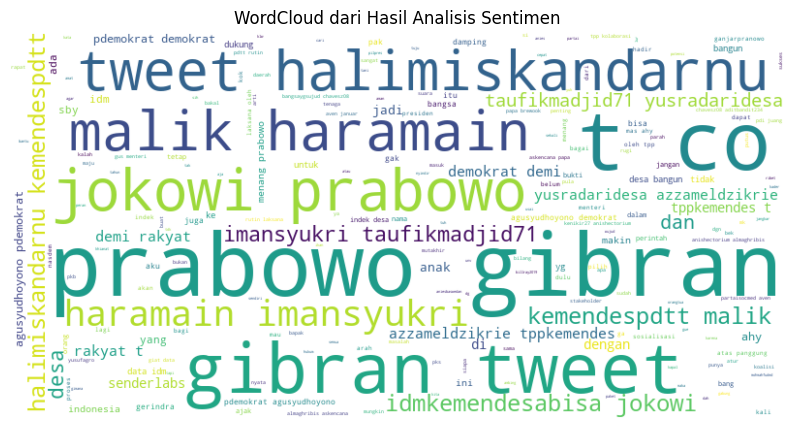

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15628\2426799393.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')


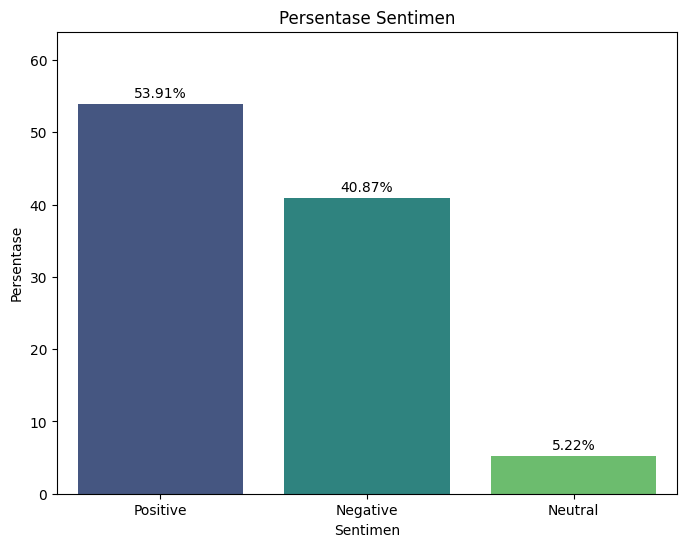

In [9]:
# Menggabungkan semua teks hasil analisis sentimen menjadi satu string
all_text = ' '.join(df['pre-process'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Hasil Analisis Sentimen')
plt.show()

sentiment_labels = ['Positive', 'Negative', 'Neutral']
percentages = [percentage_positive, percentage_negative, percentage_neutral]

# Membuat bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=sentiment_labels, y=percentages, palette='viridis')

# Menambahkan nilai di atas setiap bar
for i in range(len(percentages)):
    plt.text(i, percentages[i] + 0.5, f'{percentages[i]:.2f}%', ha='center', va='bottom')

plt.title('Persentase Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Persentase')
plt.ylim(0, max(percentages) + 10)  # Tambahkan sedikit margin di atas bar
plt.show()

In [5]:
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
print(FPA)
PA = AA/(AA+FPA)
print(PA)
FPB = BA+BC
print(FPB)
PB = BB/(BB+FPB)
print(PB)
FPC = CA+CB
print(FPC)
PC = CC/(CC+FPC)
print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
print(FNA)
RA = AA/(AA+FNA)
print(RA)
FNB = AB+CB
print(FNB)
RB = BB/(BB+FNB)
print(RB)
FNC = AC+BC
print(FNC)
RC = CC/(CC+FNC)
print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

1
0.9821428571428571
6
0.8666666666666667
9
0.35714285714285715
recall
7
0.8870967741935484
8
0.8297872340425532
1
0.8333333333333334
Accuracy :  0.8608695652173913 ==  86.08695652173914 %
Precision :  0.7353174603174604 ==  73.53174603174604 %
Recall :  0.8500724471898117 ==  85.00724471898117 %
F1-Score :  0.7885418091708063 ==  78.85418091708063 %


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords jika belum ada
nltk.download('stopwords')
nltk.download('punkt')

# Daftar stopword bahasa Indonesia (contoh)
stop_words = set(stopwords.words('indonesian'))

print(stop_words)

{'jawabnya', 'tertentu', 'tetapi', 'kelima', 'tiap', 'tambah', 'dilakukan', 'misalnya', 'adapun', 'maka', 'khususnya', 'kemungkinan', 'tempat', 'antaranya', 'apatah', 'bawah', 'diibaratkan', 'turut', 'malahan', 'dahulu', 'benarkah', 'sekalipun', 'serupa', 'dimulai', 'kepadanya', 'diakhiri', 'kiranya', 'ingat-ingat', 'sangatlah', 'pihak', 'enggak', 'memperlihatkan', 'paling', 'ditanyakan', 'tanpa', 'dengan', 'selama', 'mengatakan', 'dituturkannya', 'menghendaki', 'itukah', 'kembali', 'akhiri', 'menyeluruh', 'naik', 'berkali-kali', 'tak', 'secukupnya', 'kata', 'mengapa', 'pastilah', 'mula', 'sekalian', 'menunjuknya', 'dimaksudkannya', 'berjumlah', 'mempergunakan', 'dikarenakan', 'setibanya', 'bermula', 'mungkin', 'jadi', 'karena', 'terutama', 'para', 'kira-kira', 'mau', 'melakukan', 'merekalah', 'bersama-sama', 'sepihak', 'lewat', 'memberi', 'lanjutnya', 'selamanya', 'berada', 'semasih', 'tampak', 'apabila', 'bukannya', 'beginilah', 'ibaratkan', 'jikalau', 'diingatkan', 'sesudahnya', 'ag

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
